In [6]:
%run -i FeatureEngineering.py
%run -i BestEstimator.py

import sklearn
import pandas 
import xgboost
import numpy

print('Pandas version :', pandas.__version__)
print('Sklearn version :', sklearn.__version__)
print('Xgboost version :', xgboost.__version__)
print('Numpy version :', numpy.__version__)

Pandas version : 0.23.4
Sklearn version : 0.20.1
Xgboost version : 0.82
Numpy version : 1.15.4


# Data importation

In [7]:
Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Train.csv", sep = ',')
Target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Target.csv", sep = ';')
Test = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Test.csv")

# Classes called

In [8]:
BE = BestEstimator(type_esti = 'Classifier',          # Classifier or Regressor
                  cv = 3,                             # number of fold for the first check cross validation
                  grid = True,                        # if True, implement a GridSearchCV
                  hard_grid = True,                   # if True, use a bigger set of hyperparametres
                  cv_grid = 3)                        # number of fold for the GridSearchCV
                  

FE = FeatureEngineering(Train)                        # Dataset
                       

## FeatureEngineering class

#### Check the missing values

In [20]:
FE.Missing_Values()  # Display some statistics on missing values

Missing Values :

                      Total       %
WARRANTIES_PRICE      96603  96.603
SHIPPING_PRICE        67610  67.610
BUYER_BIRTHDAY_DATE    5836   5.836
SHIPPING_MODE           315   0.315
PRICECLUB_STATUS         57   0.057
SELLER_SCORE_AVERAGE      6   0.006
SELLER_SCORE_COUNT        6   0.006 



#### Check which features are categorical and show all their items 

In [21]:
FE.Unique() # Display all categorical features with their labels of the dataset used


 SHIPPING_MODE : 
 
 ['NORMAL' 'RECOMMANDE' 'EXPRESS_DELIVERY' 'SUIVI' 'SO_RECOMMANDE'
 'MONDIAL_RELAY' 'MONDIAL_RELAY_PREPAYE' 'SO_POINT_RELAIS' nan
 'CHRONOPOST' 'PICKUP' 'Kiala'] 


 SHIPPING_PRICE : 
 
 [nan '5<10' '10<20' '<1' '1<5' '>20'] 


 WARRANTIES_FLG : 
 
 [False  True] 


 WARRANTIES_PRICE : 
 
 [nan '5<20' '<5' '20<50' '50<100' '100<500'] 


 PRICECLUB_STATUS : 
 
 ['UNSUBSCRIBED' 'PLATINUM' 'SILVER' 'REGULAR' 'GOLD' nan] 


 PURCHASE_COUNT : 
 
 ['<5' '50<100' '>500' '5<20' '100<500' '20<50'] 


 BUYING_DATE : 
 
 ['3/2017' '8/2017' '5/2017' '9/2017' '1/2017' '4/2017' '7/2017' '10/2017'
 '2/2017' '6/2017'] 


 SELLER_SCORE_COUNT : 
 
 ['10000<100000' '1000<10000' '100000<1000000' '100<1000' '<100' nan] 


 SELLER_COUNTRY : 
 
 ['FRANCE, METROPOLITAN' 'CHINA' 'HONG KONG' 'SPAIN' 'UNITED KINGDOM'
 'GERMANY' 'ANDORRA' 'SWITZERLAND' 'GIBRALTAR' 'ITALY' 'UNITED STATES'
 'NETHERLANDS' 'LUXEMBOURG' 'AUSTRIA' 'PORTUGAL' 'BULGARIA' 'BELGIUM'
 'JAPAN' 'LIECHTENSTEIN' 'SLOVENIA' 

### Feature transformation

In [ ]:
FE.To_numeric_freq(columns = 'all')  # Transform a categorical column into item frequence
                                     # columns = 'all' or ['column1','column2',...]
    
FE.To_numeric_quant(columns = 'all') # Transform a categorical column into item count
                                     # columns = 'all' or ['column1','column2',...]

FE.OneHotEncoder(columns)            # One hot encode a feature
                                     # columns = ['column1', 'column2',...]
    
FE.To_numeric_custom(Dict_custom)    # Transform a categorical feature into custom numeric one
                                     
                                     # exemple of dict : Dict_custom = {"column" : ['name_column'], 
                                     # "categ" : ["categ1", "categ2", "etc..."],
                                     #   "to_numeric" :  [1,2,3]}


### Plot and distribution

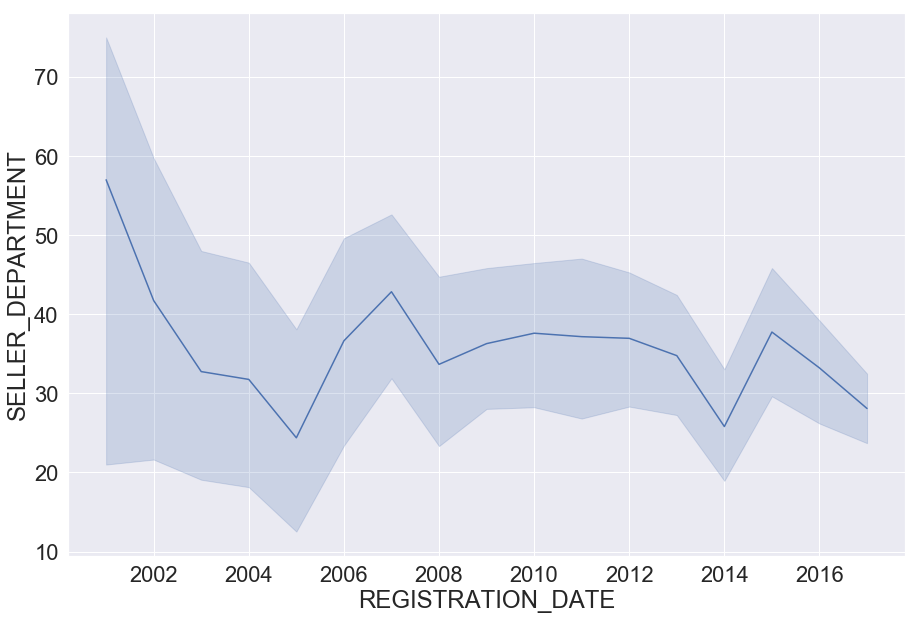

In [16]:
FE.Plot(feature1 = 'REGISTRATION_DATE', feature2 = 'SELLER_DEPARTMENT', # features to plot
       Data_base = True,  # if True, use the original dataset else, use the transform dataset from methods above
       figsize = (15,10), # set the figure size
       n = 1000)          # sample size to use for plotting

C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidim

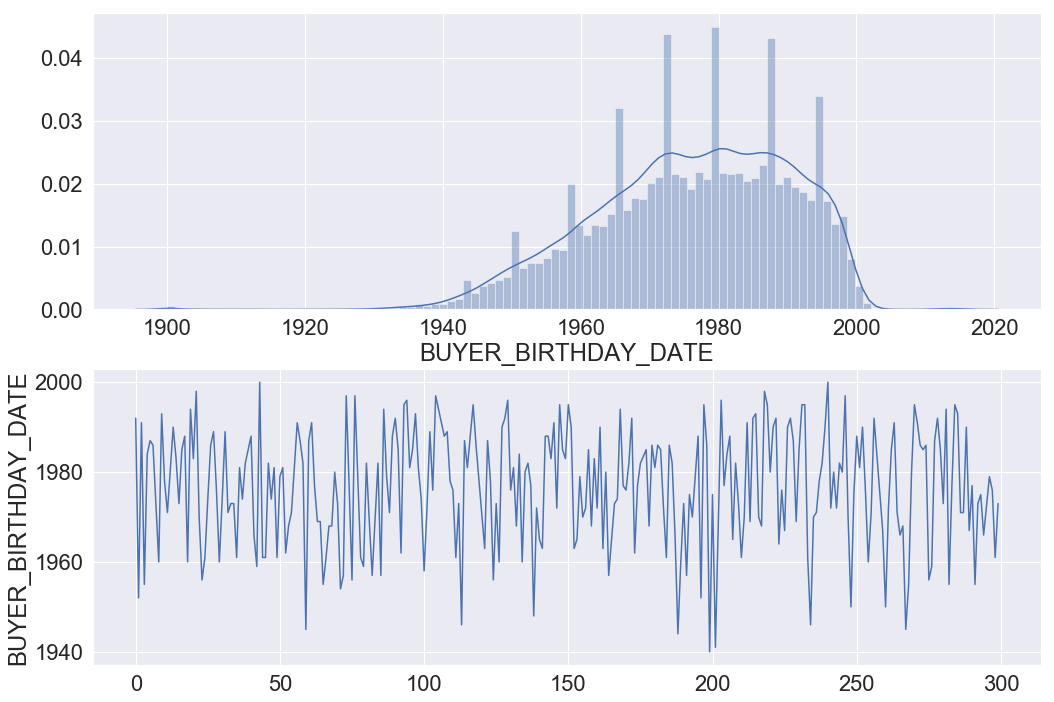

In [73]:
FE.feature_dist(feature = 'BUYER_BIRTHDAY_DATE', # Feature to analyse
               Data_base = True,        # if True, use the original dataset else use the transform dataset from methods above
               figsize = (17,12),       # set the figure size
               n = 300                  # sample size to use for the lineplot
               bins = 100)              # set the bins for histogram

## BestEstimator Class

### Feature Importances

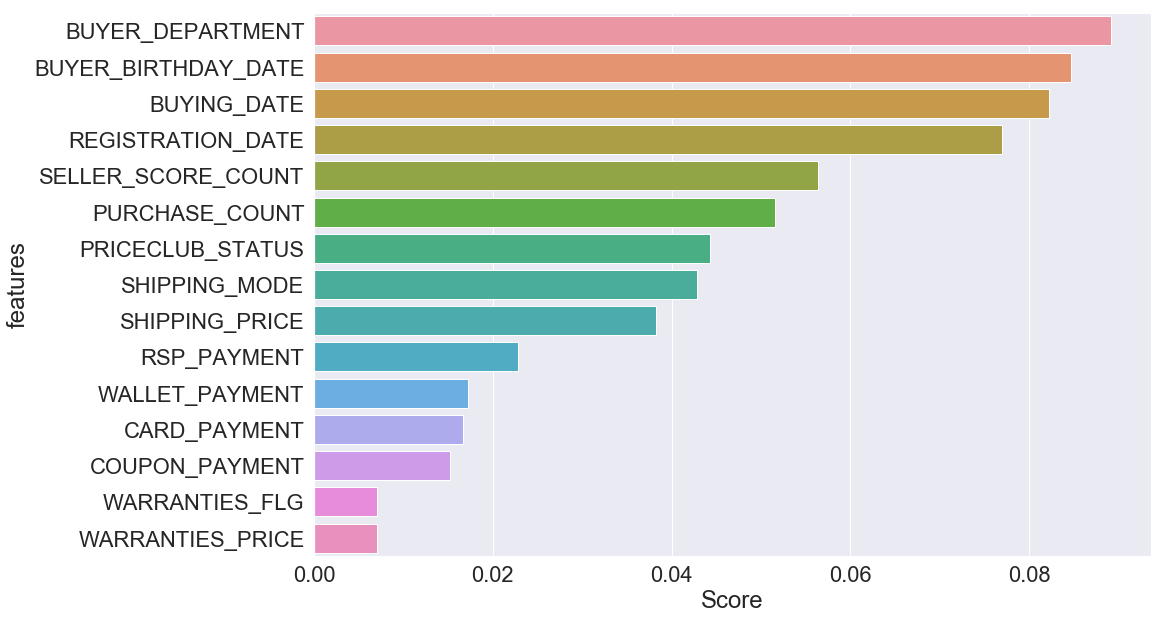

In [31]:
# Feature importance using Gini score

BE.Feature_Importances_Tree(Train, 
                            Target,
                           ID = 'ID',             # ID column name to drop
                           value = 0,             # Value for filling NaN
                           n = 1000,              # sample size 
                           figsize = (15,10),     # set the figure size
                           nb_features = 15)      # Show this number of highest feature importance score

In [32]:
# Feature importance using a statistic test to choose

BE.Feature_Importances_Test(Train, 
                            Target, 
                            ID='ID', 
                            value=0, 
                            n=1000, 
                            nb_features=15,
                            test_used = f_classif)

,Features,f_classif
0,SELLER_SCORE_AVERAGE,17.216671
1,ITEM_PRICE,8.594897
2,SELLER_SCORE_COUNT,5.947787
3,SELLER_DEPARTMENT,3.133100
4,SHIPPING_MODE,2.481947
5,REGISTRATION_DATE,2.361468
6,SHIPPING_PRICE,2.288408
7,PURCHASE_COUNT,1.875314
8,BUYER_BIRTHDAY_DATE,1.792215
9,SELLER_COUNTRY,1.395068


In [33]:
# Display the most corralated features with the target and show tha absolute correlation

BE.get_highest_corr_target(Train, Target, ID='ID', value=0, n = 500, nb_features = 15)

,features,Target Correlation
0,SELLER_SCORE_AVERAGE,0.199755
1,ITEM_PRICE,0.185426
2,PRODUCT_TYPE,0.135933
3,SHIPPING_PRICE,0.095060
4,SELLER_SCORE_COUNT,0.091340
5,WARRANTIES_PRICE,0.081010
6,PRODUCT_FAMILY,0.076133
7,SELLER_COUNTRY,0.072617
8,WARRANTIES_FLG,0.071631
9,PRICECLUB_STATUS,0.069498


##  Correlation 

In [34]:
# Display the most corraleted paire feature

BE.get_highest_corr(Train, ID = 'ID', value = 0, n_pairs = 8, n = 500)

,feature_1,feature_2,correlation_abs
0,WARRANTIES_FLG,WARRANTIES_PRICE,0.982630
1,WALLET_PAYMENT,CARD_PAYMENT,0.655717
2,RSP_PAYMENT,PRICECLUB_STATUS,0.540061
3,REGISTRATION_DATE,PURCHASE_COUNT,0.442369
4,SHIPPING_PRICE,SELLER_DEPARTMENT,0.374038
5,PRICECLUB_STATUS,PURCHASE_COUNT,0.360268
6,SELLER_SCORE_COUNT,SELLER_SCORE_AVERAGE,0.359478
7,PURCHASE_COUNT,RSP_PAYMENT,0.300264


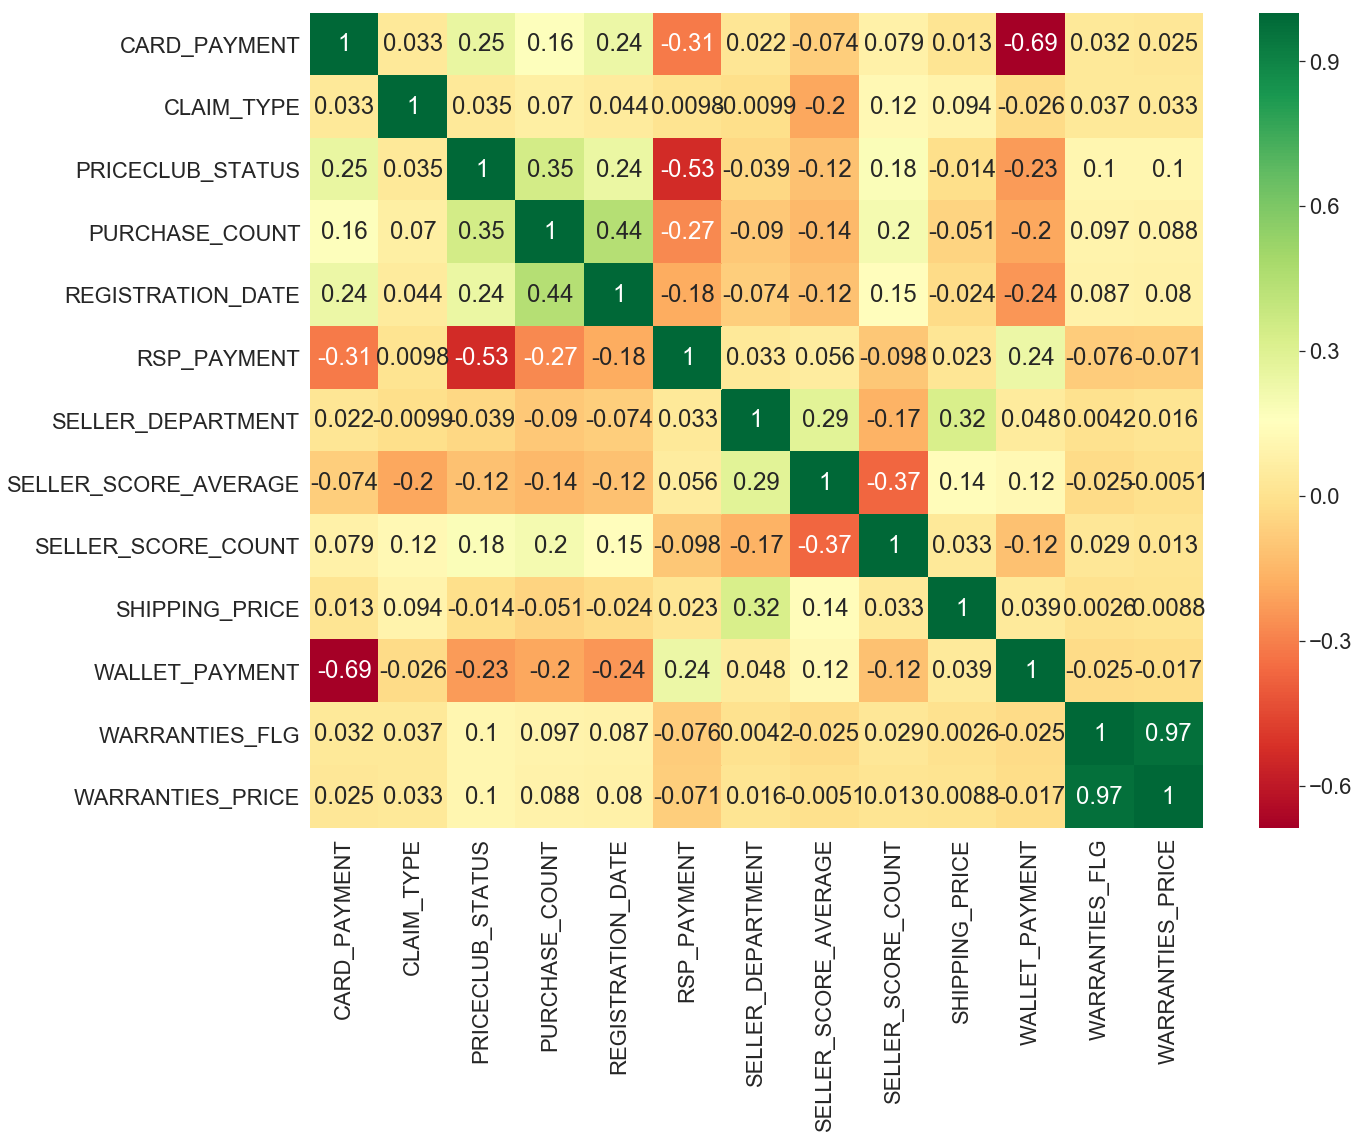

In [37]:
# Display the correlation matrix colored

BE.corr_mat(Train, Target, ID = 'ID', value = 0, figsize = (20, 15), n = 1000, n_pairs = 8)

## Pipeline

In [9]:
# This method launch several Machine Leaning algorithms and fit the data (on a sample) then, the hyperparametres 
# of the best algotithm is optimize (with a GridSearchCV) and displayed.
# The estimator is saved for later prediction


BE.fit(Train, Target,             # Train and Target dataset
            ID='ID',              # ID column name
            target_ID=True,       # True if the Target have an ID column
            n=1000,               # Sample size for the first check
            n_grid=1000,          # Sample size for the GridSearchCV
            view_nan=True,        # if True, show the missing values
            value=0,              # value for filling NaN
            scoring='accuracy')   # metric to optimize

Missing Values :

                      Total       %
WARRANTIES_PRICE      96603  96.603
SHIPPING_PRICE        67610  67.610
BUYER_BIRTHDAY_DATE    5836   5.836
SHIPPING_MODE           315   0.315
PRICECLUB_STATUS         57   0.057
SELLER_SCORE_AVERAGE      6   0.006
SELLER_SCORE_COUNT        6   0.006 

Missing values filled by 0 

Searching for the best Classifier on 1000 datas using accuracy loss... 


 Bagging: 0.474123 (+/- 2.737e-04)

 Gradient Boosting: 0.469067 (+/- 8.257e-05)

 XGBoost: 0.490037 (+/- 6.065e-05)

 Random Forest: 0.495977 (+/- 8.626e-05)

 Decision Tree: 0.351963 (+/- 1.918e-04)

 Extra Tree: 0.479870 (+/- 4.256e-04)

 KNN: 0.446977 (+/- 3.986e-05)

 SVM: 0.487007 (+/- 1.786e-06)

 Searching for the best hyperparametres of Random Forest using hard_grid on 1000 data among : 

{'n_estimators': [10, 100, 300, 600, 1000, 1200], 'max_depth': [5, 10, 15, 20, 25], 'criterion': ['gini', 'entropy']} 

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.5min finished



 In the end, the best estimator is : Random Forest Classifier

 Using these hyperparametres : {'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 600}

 With this accuracy score : 0.515


In [ ]:
# We can use a custom grid for the GridSearchCV with this method (using a Dict)

BE.custom_grid(Train, Target,      # Train and Target dataset
               ID='ID',            # ID column name
               target_ID=True,     # True if the Target have an ID column
               n=1000,             # Sample size for GridSearchCV
               metric='accuracy',  # metric to optimize
               params=None,        # Dict of hyperparametres
               cv=3,               # fold number for cross validation
               DF=None,            # estimator used
               value=0)            # value for filling NaN

In [72]:
# When an algorithm is optimized with the fit method, we can improve the prediction using an ensembling method called Bagging
# then, the estimator is saved for later prediction

BE.Bagg_fit(Train, Target,               # Train and Target dataset
               ID='ID',                  # ID column name
               n=1000,                   # Sample size for GridSearchCV
               metric='accuracy',        # metric to optimize
               cv=3,                     # fold number for cross validation
               n_estimators=[5,15,30])   # set of estimators to use              


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 30.2min finished



 Best hyperparametres : {'n_estimators': 5}

 Giving this accuracy score : 0.52


In [70]:
# To counter overfitting issues, we can use this method that give the best data sample size to fit

BE.best_size(n = [100,1000,10000,50000 ,100000], 
             metric = 'accuracy_score')

Fitting 100 datas...
100 datas -> accuracy_score = 0.4872802543949121 

Fitting 1000 datas...
1000 datas -> accuracy_score = 0.502279954400912 

Fitting 10000 datas...
10000 datas -> accuracy_score = 0.5303893922121558 

Fitting 50000 datas...
50000 datas -> accuracy_score = 0.5460490790184196 

Fitting 100000 datas...
100000 datas -> accuracy_score = 0.5476990460190796 


 In the end, the best data size is 100000 

 With this accuracy_score : 0.5476990460190796


### Prediction methods

#### Prediction from fit method

In [54]:
# This method use the the GridSearchCV estimator from the fit method to generated a prediction

BE.pred_grid(Test[0:30],    # Dataset to predict
             ID='ID',       # ID column name
             value=0)       # value to fill NaN

,ID,Target
0,100000,-
1,100001,-
2,100002,SELLER_CANCEL_POSTERIORI
3,100003,-
4,100004,NOT_RECEIVED
5,100005,-
6,100006,-
7,100007,SELLER_CANCEL_POSTERIORI
8,100008,-
9,100009,-


In [56]:
# This method use the the GridSearchCV estimator from the fit method to generated a probability prediction of each label


BE.pred_grid_proba(Test[0:30],  # Dataset to predict
                   ID = 'ID',   # ID column name
                   value = 0)   # value for filling NaN

,ID,-,DAMAGED,DIFFERENT,NOT_RECEIVED,SELLER_CANCEL_POSTERIORI,UNDEFINED,WITHDRAWAL
0,100000,0.426388,0.061266,0.027067,0.181528,0.160734,0.056410,0.086607
1,100001,0.391425,0.015610,0.056432,0.154746,0.188582,0.037072,0.156132
2,100002,0.303740,0.070769,0.030000,0.121350,0.327808,0.095156,0.051176
3,100003,0.655295,0.032618,0.018257,0.103509,0.113336,0.044204,0.032780
4,100004,0.223868,0.070068,0.122983,0.293512,0.114028,0.070699,0.104843
5,100005,0.408444,0.035000,0.005333,0.139382,0.146032,0.193031,0.072778
6,100006,0.386869,0.060667,0.086929,0.113024,0.214455,0.076667,0.061389
7,100007,0.289872,0.062308,0.021667,0.152747,0.310000,0.096484,0.066923
8,100008,0.501426,0.101667,0.023056,0.128053,0.149308,0.019649,0.076843
9,100009,0.422931,0.068028,0.042833,0.137049,0.170095,0.067519,0.091544


##### Prediction using a refit estimator

In [66]:
# This method fit an estimator using the best hyperparametres of the algorithm found in the fit method
# then, a prediction is generated from this estimator


BE.pred(Test[0:30],      # dataset to predict
        ID='ID',         # ID column name
        value=0,         # value for filling NaN
        n=1000,          # size sample to fit if refit = True
        refit = True)    # if True, refit the Train and Target

,ID,Target
0,100000,-
1,100001,-
2,100002,SELLER_CANCEL_POSTERIORI
3,100003,-
4,100004,-
5,100005,SELLER_CANCEL_POSTERIORI
6,100006,-
7,100007,NOT_RECEIVED
8,100008,-
9,100009,-


In [68]:
# This method fit an estimator using the best hyperparametres of the algorithm found in the fit method
# then, a probability of each label is predict


BE.pred_proba(Test[0:30],      # dataset to predict
              ID='ID',         # ID column name
              value=0,         # value for filling NaN
              n=1000,          # size sample to fit if refit = True
              refit = True)    # if True, refit the Train and Target

,ID,-,DAMAGED,DIFFERENT,FAKE,NOT_RECEIVED,SELLER_CANCEL_POSTERIORI,UNDEFINED,WITHDRAWAL
0,100000,0.468157,0.051475,0.034024,0.002021,0.128015,0.189042,0.058905,0.068362
1,100001,0.441692,0.057201,0.053548,0.003901,0.098317,0.193801,0.058603,0.092936
2,100002,0.193064,0.026272,0.063224,0.006667,0.160381,0.416967,0.040262,0.093163
3,100003,0.444557,0.061163,0.033258,0.001667,0.134842,0.208536,0.043392,0.072586
4,100004,0.278700,0.108784,0.060705,0.035127,0.194992,0.108385,0.088250,0.125056
5,100005,0.262841,0.021584,0.037911,0.003333,0.123834,0.311878,0.055490,0.183128
6,100006,0.437169,0.072358,0.044418,0.001667,0.119462,0.166316,0.058569,0.100042
7,100007,0.279811,0.076933,0.066468,0.005000,0.239921,0.183531,0.047720,0.100616
8,100008,0.383340,0.081723,0.049003,0.010000,0.133582,0.186715,0.049264,0.106373
9,100009,0.347293,0.058823,0.052727,0.018333,0.215458,0.148061,0.037527,0.121777


# Example :
### Prediction of Sharpe ratio for blends of quantitative strategies 
### by Napoleon X 

In [2]:
Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Pipeline\Training_Input_2dx8C9Q.csv", sep = ',')
Target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Pipeline\Training_Output_IJhBXtA.csv", sep = ',')
Test = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Pipeline\Testing_Input_dPKY3Rf.csv")

In [5]:
%run -i BestEstimator.py
BE = BestEstimator(type_esti = 'Regressor',           # Classifier or Regressor
                  cv = 3,                             # number of fold for the first check cross validation
                  grid = True,                        # if True, implement a GridSearchCV
                  hard_grid = True,                   # if True, use a bigger set of hyperparametres
                  cv_grid = 3)                        # number of fold for the GridSearchCV
                  
FE = FeatureEngineering(Train)                        # Dataset

In [6]:
FE.Missing_Values()

No missing values


In [7]:
FE.Unique()

All columns are numerics


C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


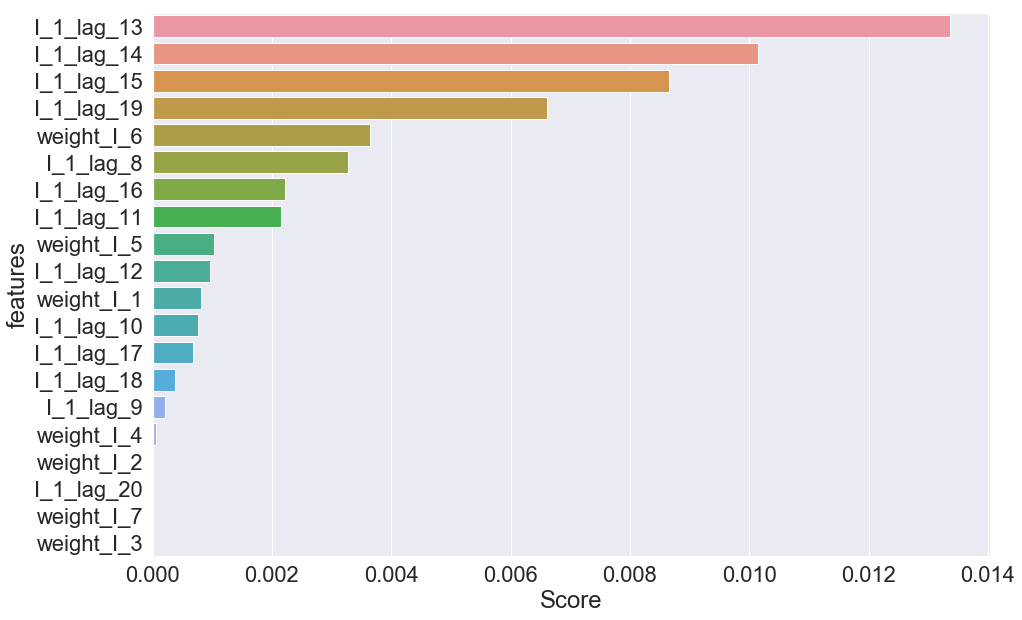

In [12]:
BE.Feature_Importances_Tree(Train, 
                            Target,
                            ID = 'ID',             # ID column name to drop
                            value = 0,             # Value for filling NaN
                            n = 1000,              # sample size 
                            figsize = (15,10),     # set the figure size
                            nb_features = 20)      # Show this number of highest feature importance score

In [34]:
BE.Feature_Importances_Test(Train, 
                            Target, 
                            ID='ID', 
                            value=0, 
                            n=1000, 
                            nb_features=15,
                            test_used = f_regression)

C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  r

,Features,f_regression
0,I_6_lag_14,31.035261
1,I_6_lag_15,23.801433
2,I_5_lag_7,23.598252
3,I_5_lag_11,22.814180
4,I_5_lag_10,21.748611
5,I_5_lag_15,20.756872
6,I_5_lag_4,20.475567
7,I_5_lag_1,20.421985
8,I_5_lag_2,19.953066
9,I_5_lag_5,18.685276


In [35]:
BE.get_highest_corr_target(Train, Target, ID='ID', value=0, n = 500, nb_features = 15)

C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


,features,Target Correlation
0,I_6_lag_14,0.188973
1,I_6_lag_15,0.165724
2,I_5_lag_1,0.164448
3,I_5_lag_2,0.157397
4,I_5_lag_0,0.154491
5,X_2_lag_0,0.149920
6,I_3_lag_2,0.144261
7,I_5_lag_5,0.142745
8,I_3_lag_0,0.141961
9,I_6_lag_10,0.141589


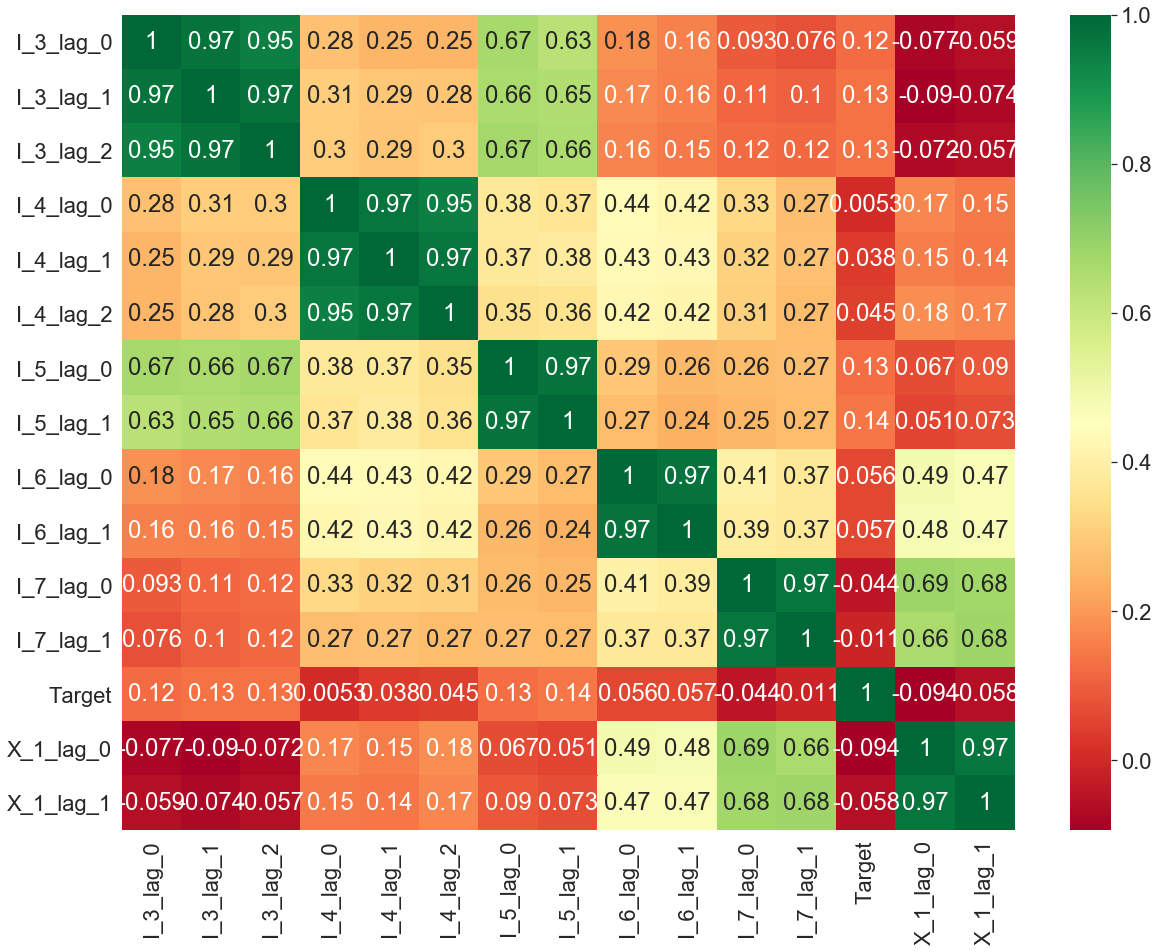

In [36]:
BE.corr_mat(Train, Target, ID = 'ID', value = 0, figsize = (20, 15), n = 1000, n_pairs = 8)

In [13]:
BE = BestEstimator(type_esti = 'Regressor',           # Classifier or Regressor
                  cv = 3,                             # number of fold for the first check cross validation
                  grid = True,                        # if True, implement a GridSearchCV
                  hard_grid = True,                   # if True, use a bigger set of hyperparametres
                  cv_grid = 3)                        # number of fold for the GridSearchCV
                  

BE.fit(Train, Target,             # Train and Target dataset
            ID='ID',              # ID column name
            target_ID=True,       # True if the Target have an ID column
            n=5000,               # Sample size for the first check
            n_grid=2000,          # Sample size for the GridSearchCV
            view_nan=True,        # if True, show the missing values
            value=0,              # value for filling NaN
            scoring='neg_mean_absolute_error')   # metric to optimize

No missing values 

Searching for the best Regressor on 5000 datas using neg_mean_absolute_error loss... 


 Bagging: 2.8213 (+/- 0.0927)

 Gradient Boosting: 3.0098 (+/- 0.1170)

 XGBoost: 3.0104 (+/- 0.0851)

 Random Forest: 2.8252 (+/- 0.0929)

 Decision Tree: 2.8224 (+/- 0.0948)

 Extra Tree: 2.8224 (+/- 0.0948)

 KNN: 2.9719 (+/- 0.0396)

 SVM: 2.9158 (+/- 0.1205)

 Searching for the best hyperparametres of Bagging using hard_grid on 2000 data among : 

{'n_estimators': [100, 300, 600, 1000, 1200, 1500]} 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  5.8min finished



 In the end, the best estimator is : Bagging Regressor

 Using these hyperparametres : {'n_estimators': 1000}

 With this neg_mean_absolute_error score : 2.9979501284982293


In [14]:
Pred = BE.pred_grid(Test)

In [15]:
Pred.to_csv('pred.csv', sep =',', index = False)

In [18]:
BE.best_size(n = [1000,3000,5000 ,7000, 10000], 
             metric = 'mean_absolute_error')

Fitting 3000 datas...
3000 datas -> mean_absolute_error = 2.7614718933269304 

Fitting 5000 datas...
5000 datas -> mean_absolute_error = 2.728568112025391 

Fitting 7000 datas...
7000 datas -> mean_absolute_error = 2.7235773733127933 

Fitting 10000 datas...
10000 datas -> mean_absolute_error = 2.7233756460170446 


 In the end, the best data size is 10000 

 With this mean_absolute_error : 2.7233756460170446


In [8]:
BE.get_highest_corr(Train, ID = 'ID', value = 0, n_pairs = 8, n = 500)

C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


,feature_1,feature_2,correlation_abs
0,I_6_lag_0,I_6_lag_1,0.974787
1,I_3_lag_1,I_3_lag_0,0.973499
2,I_5_lag_1,I_5_lag_0,0.972516
3,I_4_lag_0,I_4_lag_1,0.969988
4,I_3_lag_1,I_3_lag_2,0.968987
5,I_4_lag_1,I_4_lag_2,0.968446
6,X_1_lag_1,X_1_lag_0,0.968003
7,I_7_lag_0,I_7_lag_1,0.967843


In [30]:
BE = BestEstimator(type_esti = 'Regressor',           # Classifier or Regressor
                  cv = 3,                             # number of fold for the first check cross validation
                  grid = False,                        # if True, implement a GridSearchCV
                  hard_grid = True,                   # if True, use a bigger set of hyperparametres
                  cv_grid = 3)                        # number of fold for the GridSearchCV
                  

BE.fit(Train, Target,             # Train and Target dataset
            ID='ID',              # ID column name
            target_ID=True,       # True if the Target have an ID column
            n=3000,               # Sample size for the first check
            n_grid=2000,          # Sample size for the GridSearchCV
            view_nan=True,        # if True, show the missing values
            value=0,              # value for filling NaN
            scoring='neg_mean_absolute_error')   # metric to optimize

No missing values 

Searching for the best Regressor on 3000 datas using neg_mean_absolute_error loss... 


 Bagging: 2.898597 (+/- 5.931e-03)

 Gradient Boosting: 3.027981 (+/- 4.432e-03)

 XGBoost: 3.054294 (+/- 3.798e-03)

 Random Forest: 2.895544 (+/- 8.753e-03)

 Decision Tree: 2.894811 (+/- 7.114e-03)

 Extra Tree: 2.894811 (+/- 7.114e-03)

 KNN: 3.006053 (+/- 4.176e-03)

 SVM: 3.098090 (+/- 1.399e-02)

 Best Regressor : Decision Tree


In [31]:
BE.fit(Train.drop(['I_6_lag_0','I_3_lag_1','I_5_lag_1','I_4_lag_0','I_3_lag_1'], axis = 1), Target,             # Train and Target dataset
            ID='ID',              # ID column name
            target_ID=True,       # True if the Target have an ID column
            n=3000,               # Sample size for the first check
            n_grid=2000,          # Sample size for the GridSearchCV
            view_nan=True,        # if True, show the missing values
            value=0,              # value for filling NaN
            scoring='neg_mean_absolute_error')   # metric to optimize

No missing values 

Searching for the best Regressor on 3000 datas using neg_mean_absolute_error loss... 


 Bagging: 2.900887 (+/- 7.702e-03)

 Gradient Boosting: 3.032183 (+/- 4.939e-03)

 XGBoost: 3.054854 (+/- 4.941e-03)

 Random Forest: 2.902382 (+/- 7.289e-03)

 Decision Tree: 2.894811 (+/- 7.114e-03)

 Extra Tree: 2.894811 (+/- 7.114e-03)

 KNN: 3.006053 (+/- 4.176e-03)

 SVM: 3.098014 (+/- 1.400e-02)

 Best Regressor : Decision Tree
